## Variáveis de entrada

Variáveis para avaliação do aplicativo uberEats

***Qualidade:*** Qualidade da comida<br/>
***Serviço:*** Qualidade do serviço de entrega

## Variável de saída

A variável de saída é simplesmente uma gorgeta atribuída pelo usuário sobre o serviço prestado, em pontos percentuais:

***Gorgeta (R$)*** 

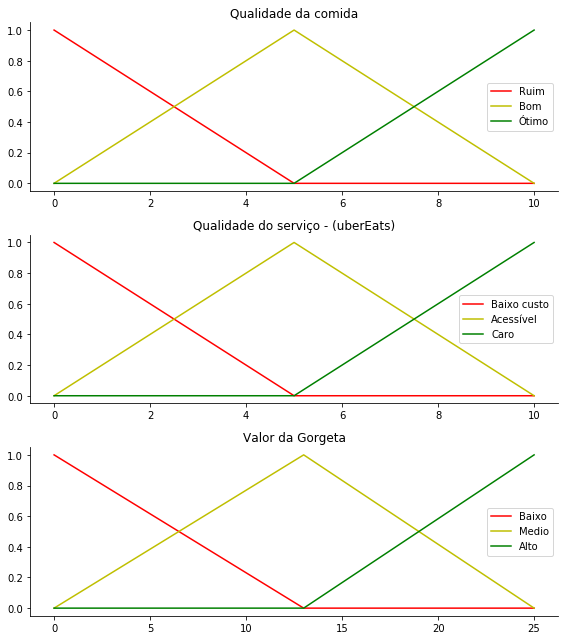

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# gerando variávies
# qualidade da comida e serviço em variando de [0, 10]
# pontuação varia de[0, 5] estrelas
qual = np.arange(0, 11, 1)
serv = np.arange(0, 11, 1)
gorg  = np.arange(0, 26, 1)

# funções de associação fuzzy
qual_ruim = fuzz.trimf(qual, [0, 0, 5])
qual_bom = fuzz.trimf(qual, [0, 5, 10])
qual_otimo = fuzz.trimf(qual, [5, 10, 10])
serv_baixoCusto = fuzz.trimf(serv, [0, 0, 5])
serv_acessivel = fuzz.trimf(serv, [0, 5, 10])
serv_caro = fuzz.trimf(serv, [5, 10, 10])
gorg_baixo = fuzz.trimf(gorg, [0, 0, 13])
gorg_medio = fuzz.trimf(gorg, [0, 13, 25])
gorg_alto = fuzz.trimf(gorg, [13, 25, 25])

# plotar as funções de associação
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(qual, qual_ruim, 'r', linewidth=1.5, label='Ruim')
ax0.plot(qual, qual_bom, 'y', linewidth=1.5, label='Bom')
ax0.plot(qual, qual_otimo, 'g', linewidth=1.5, label='Ótimo')
ax0.set_title('Qualidade da comida')
ax0.legend()

ax1.plot(serv, serv_baixoCusto, 'r', linewidth=1.5, label='Baixo custo')
ax1.plot(serv, serv_acessivel, 'y', linewidth=1.5, label='Acessível')
ax1.plot(serv, serv_caro, 'g', linewidth=1.5, label='Caro')
ax1.set_title('Qualidade do serviço - (uberEats)')
ax1.legend()

ax2.plot(gorg, gorg_baixo, 'r', linewidth=1.5, label='Baixo')
ax2.plot(gorg, gorg_medio, 'y', linewidth=1.5, label='Medio')
ax2.plot(gorg, gorg_alto, 'g', linewidth=1.5, label='Alto')
ax2.set_title('Valor da Gorgeta')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Regras Fuzzy

Para tornar esses gráficos úteis, foi definida uma relação ***difusa*** entre as variáveis de entrada e saída

Consideramos essas três regras simples:

**1)** Se a comida é ruim OU o serviço é de baixoCusto, então a gorgeta será baixa <br>
**2)** Se o serviço for acessível, a gorgeta será média <br>
**3)** Se a comida é ótima e o serviço é ótimo, então a gorgeta será alta <br>

## Aplicação da regra

**Qual seria o valor atribuído para a gorgetea na seguinte situação?**

- A qualidade da comida foi **6,5**
- O serviço **9,8**

***Obs:** Este valores foram adotados para teste, portanto o ***usuário*** fica a vontade para alterá-los a fim de obter resultados em demais situações


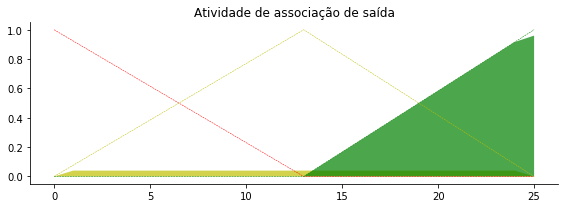

In [8]:
# ativação das funçoes de pertinencia para os vsalores de entrada
# os valores exatos 6.5 e 9.8 não existem nos universos ...
# fuzz.interp_membership entra na jogada para resolver isso!
nivel_qual_ruim = fuzz.interp_membership (qual, qual_ruim, 6.5)
nivel_qual_boa = fuzz.interp_membership (qual, qual_bom, 6.5)
nivel_qual_otimo = fuzz.interp_membership (qual, qual_otimo, 6.5)

nivel_serv_baixoCusto = fuzz.interp_membership (serv, serv_baixoCusto, 9.8)
nivel_serv_acessivel = fuzz.interp_membership (serv, serv_acessivel, 9.8)
nivel_serv_caro = fuzz.interp_membership (serv, serv_caro, 9.8)

# a regra 1 diz respeito a comida ruim OU serviço.
# O operador OR significa que tomamos o máximo desses dois.
regra1 = np.fmax (nivel_qual_ruim, nivel_serv_baixoCusto)

# função de associação com `np.fmin`
func_gorg_baixa = np.fmin (regra1, gorg_baixo) # removido inteiramente para 0

# regra 2, conectamos o serviço aceitável ao depósito médio
func_gorg_media = np.fmin (nivel_serv_acessivel, gorg_medio)

# regra 3, conectamos alta manutenção OU alta comida com alta gorjeta
regra3 = np.fmax (nivel_qual_otimo, nivel_serv_caro)
func_gorg_alta = np.fmin (regra3, gorg_alto)
tip0 = np.zeros_like (gorg)

# plotando os resultados
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(gorg, tip0, func_gorg_baixa, facecolor='r', alpha=0.7)
ax0.plot(gorg, gorg_baixo, 'r', linewidth=0.5, linestyle='--', )

ax0.fill_between(gorg, tip0, func_gorg_media, facecolor='y', alpha=0.7)
ax0.plot(gorg, gorg_medio, 'y', linewidth=0.5, linestyle='--')

ax0.fill_between(gorg, tip0, func_gorg_alta, facecolor='g', alpha=0.7)
ax0.plot(gorg, gorg_alto, 'g', linewidth=0.5, linestyle='--')
ax0.set_title('Atividade de associação de saída')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Defuzzificação

Para obter uma resposta do mundo real, voltamos as funções de lógica difusa. Neste exemplo usa-se p método ***centróide***

O resultado é uma gorgeta de ***20,2%*** do valor total **(Qualidade da comida + Serviço prestado)**

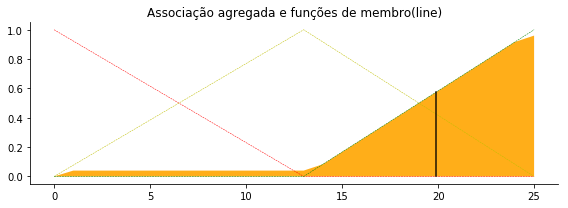

In [9]:
# Aggregate all three output membership functions together
aggregated = np.fmax(func_gorg_baixa, np.fmax(func_gorg_media, func_gorg_alta))

# Calculate defuzzified result
tip = fuzz.defuzz(gorg, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(gorg, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(gorg, gorg_baixo, 'r', linewidth=0.5, linestyle='--', )
ax0.plot(gorg, gorg_medio, 'y', linewidth=0.5, linestyle='--')
ax0.plot(gorg, gorg_alto, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(gorg, tip0, aggregated, facecolor='Orange', alpha=0.9)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Associação agregada e funções de membro(line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Considerações finais

O poder dos sistemas que utilizam a lógica fuzzy, está permitindo um comportamento complicado e intuitivo baseado em um sistema esparso de regras com sobrecarga mínima. Com todas a regras e conjuntos aplicados nesse problema, esse sistema pode responder a mudanças arbitrariamente pequenas nos insumos e a carga de processamento será sempre mínima